In [1]:
using Plots
using Interact

INFO: Interact.jl: using new nbwidgetsextension protocol


In [2]:
default_epsilon = 0.3226
default_kappa = 1.590
default_delta = 0.333
default_radius = 9.0722
default_sigma = 0.1

return

In [3]:
function itr(cur_value::AbstractFloat, cur_count=11)
    dif_value = cur_value * 0.7
    min_value = cur_value - dif_value
    max_value = cur_value + dif_value
    linspace(min_value, max_value, cur_count)
end

itr (generic function with 2 methods)

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.3226 Float64 , "epsilon", 0.3226, "0.3226", 6, Interact.OptionDict(DataStructures.OrderedDict("0.09678"=>0.09678,"0.141944"=>0.141944,"0.187108"=>0.187108,"0.232272"=>0.232272,"0.277436"=>0.277436,"0.3226"=>0.3226,"0.367764"=>0.367764,"0.412928"=>0.412928,"0.458092"=>0.458092,"0.503256"=>0.503256…), Dict(0.3226=>"0.3226",0.187108=>"0.187108",0.503256=>"0.503256",0.458092=>"0.458092",0.412928=>"0.412928",0.232272=>"0.232272",0.277436=>"0.277436",0.54842=>"0.54842",0.09678=>"0.09678",0.367764=>"0.367764"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 1.5900000000000003 Float64 , "kappa", 1.5900000000000003, "1.5900000000000003", 6, Interact.OptionDict(DataStructures.OrderedDict("0.4770000000000001"=>0.477,"0.6996000000000001"=>0.6996,"0.9222000000000001"=>0.9222,"1.1448"=>1.1448,"1.3674000000000002"=>1.3674,"1.5900000000000003"=>1.59,"1.8126000000000002"=>1.8126,"2.0352"=>2.0352,"2.2578000000000005"=>2.2578,"2.4804000000000004"=>2.4804…), Dict(0.477=>"0.4770000000000001",2.4804=>"2.4804000000000004",2.703=>"2.7030000000000003",2.2578=>"2.2578000000000005",1.3674=>"1.3674000000000002",1.59=>"1.5900000000000003",1.8126=>"1.8126000000000002",2.0352=>"2.0352",0.6996=>"0.6996000000000001",1.1448=>"1.1448"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(5: "input-3" = 0.333 Float64 , "delta", 0.333, "0.333", 6, Interact.OptionDict(DataStructures.OrderedDict("0.09990000000000002"=>0.0999,"0.14652"=>0.14652,"0.19314000000000003"=>0.19314,"0.23976000000000003"=>0.23976,"0.28638"=>0.28638,"0.333"=>0.333,"0.37962"=>0.37962,"0.42624000000000006"=>0.42624,"0.47286000000000006"=>0.47286,"0.51948"=>0.51948…), Dict(0.28638=>"0.28638",0.333=>"0.333",0.51948=>"0.51948",0.0999=>"0.09990000000000002",0.47286=>"0.47286000000000006",0.5661=>"0.5661",0.14652=>"0.14652",0.23976=>"0.23976000000000003",0.42624=>"0.42624000000000006",0.37962=>"0.37962"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(7: "input-4" = 9.0722 Float64 , "radius", 9.0722, "9.0722", 6, Interact.OptionDict(DataStructures.OrderedDict("2.721660000000001"=>2.72166,"3.991768000000001"=>3.99177,"5.261876000000001"=>5.26188,"6.531984000000001"=>6.53198,"7.802092000000001"=>7.80209,"9.0722"=>9.0722,"10.342308000000001"=>10.3423,"11.612416000000001"=>11.6124,"12.882524"=>12.8825,"14.152632"=>14.1526…), Dict(9.0722=>"9.0722",14.1526=>"14.152632",15.4227=>"15.422740000000001",3.99177=>"3.991768000000001",5.26188=>"5.261876000000001",10.3423=>"10.342308000000001",2.72166=>"2.721660000000001",11.6124=>"11.612416000000001",12.8825=>"12.882524",7.80209=>"7.802092000000001"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(9: "input-5" = 0.1 Float64 , "sigma", 0.1, "0.1", 6, Interact.OptionDict(DataStructures.OrderedDict("0.030000000000000013"=>0.03,"0.04400000000000001"=>0.044,"0.05800000000000001"=>0.058,"0.07200000000000001"=>0.072,"0.08600000000000001"=>0.086,"0.1"=>0.1,"0.11399999999999999"=>0.114,"0.128"=>0.128,"0.142"=>0.142,"0.156"=>0.156…), Dict(0.156=>"0.156",0.142=>"0.142",0.086=>"0.08600000000000001",0.114=>"0.11399999999999999",0.058=>"0.05800000000000001",0.03=>"0.030000000000000013",0.1=>"0.1",0.044=>"0.04400000000000001",0.17=>"0.16999999999999998",0.128=>"0.128"…)), Any[], Any[], true, "horizontal", true)

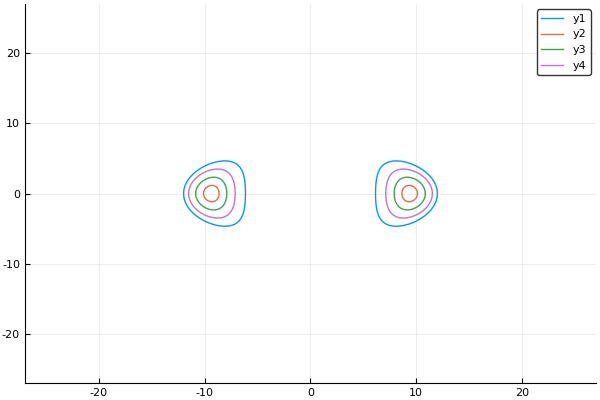

In [4]:
@manipulate for epsilon=itr(default_epsilon), kappa=itr(default_kappa), delta=itr(default_delta), radius=itr(default_radius), sigma=itr(default_sigma)
    tmp_val_1 = 0.3 * ( 1 - delta ^ 2 )
    tmp_val_2 = ( -1 + 2 * delta + tmp_val_1 ) / 8
    
    cc = [
        -delta/2, 1 - tmp_val_2,
        +delta/2, 0 + tmp_val_2
    ]

    aa = linspace(0, 2*pi)
    
    xx = zeros(aa)
    
    for (cur_i, cur_c) in enumerate(cc)
        xx += cur_c * cos.( (cur_i-1) * aa )
    end
    
    yy = kappa * sin.(aa)
    
    rr = radius * ( 1 + epsilon * xx )
    zz = radius * ( 0 + epsilon * yy )
    
    plot(
        [-rr..., NaN, +rr...], 
        [+zz..., NaN, +zz...],
    )
    
    max_radius = maximum(itr(default_radius)) * 1.75
    max_height = maximum(itr(default_radius)) * 1.75
    
    xlims!(-max_radius, +max_radius)
    ylims!(-max_radius, +max_radius)
    
    cur_rhos = collect(linspace(0, 1, 5))
    pop!(cur_rhos)
    shift!(cur_rhos)
            
    for rho in cur_rhos
        xxr = zeros(xx)
        
        xxr += sigma * ( 1 - rho ^ 2 )
        xxr += cc[0+1] * rho ^ 4
        xxr += cc[1+1] * rho ^ 1 * cos.(1 * aa)
        xxr += cc[2+1] * rho ^ 2 * cos.(2 * aa)
        xxr += cc[3+1] * rho ^ 3 * cos.(3 * aa)
        
        yyr = yy * rho
       
        rrr = radius * ( 1 + epsilon * xxr )
        zzr = radius * ( 0 + epsilon * yyr )
        
        plot!(
            [-rrr..., NaN, +rrr...], 
            [+zzr..., NaN, +zzr...],
        )
    end
    
    plot!()
end

Interact.Options{:SelectionSlider,Float64}(13: "input-6" = 1.0 Float64 , "nu", 1.0, "1.0", 6, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.2"=>0.2,"0.4"=>0.4,"0.6"=>0.6,"0.8"=>0.8,"1.0"=>1.0,"1.2"=>1.2,"1.4"=>1.4,"1.6"=>1.6,"1.8"=>1.8…), Dict(0.6=>"0.6",1.2=>"1.2",2.0=>"2.0",1.4=>"1.4",0.0=>"0.0",0.2=>"0.2",0.8=>"0.8",1.6=>"1.6",0.4=>"0.4",1.8=>"1.8"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(15: "input-7" = 0.25 Float64 , "g", 0.25, "0.25", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.5"=>-1.5,"-1.325"=>-1.325,"-1.15"=>-1.15,"-0.975"=>-0.975,"-0.8"=>-0.8,"-0.625"=>-0.625,"-0.45"=>-0.45,"-0.275"=>-0.275,"-0.1"=>-0.1,"0.075"=>0.075…), Dict(0.95=>"0.95",-0.45=>"-0.45",2.0=>"2.0",1.125=>"1.125",0.25=>"0.25",0.425=>"0.425",-0.625=>"-0.625",-0.275=>"-0.275",0.775=>"0.775",-0.975=>"-0.975"…)), Any[], Any[], true, "horizontal", true)

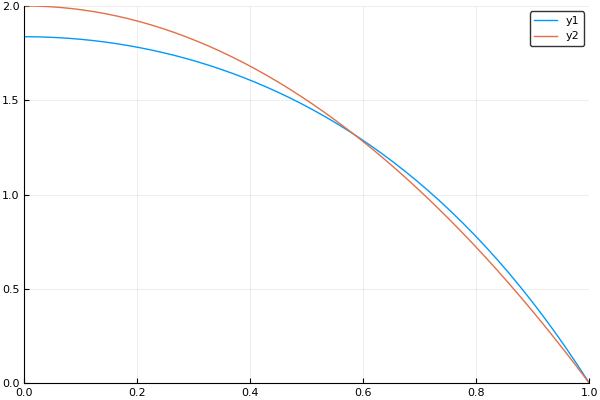

In [5]:
rr = linspace(0,1)

@manipulate for nu = linspace(0,2,11), g=linspace(-1.5,2,21)
    nn = 1 - rr .^ 2
    nn .^= nu
    nn *= 1 + nu

    jj = g^2 * ( 1 - rr .^ 2 ) .* exp.( g * rr .^ 2 ) 
    jj /= ( exp(g) - 1 - g )
    
    plot(rr, jj)
    plot!(rr, nn)
end